# Regression Analysis

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 70)
import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

#from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
df_test_over_prob = pd.read_csv('df_test_over_prob.csv')
df_test_over_prob = df_test_over_prob .drop('Unnamed: 0', axis = 1)

In [3]:
df_test_over_prob.columns

Index(['fsv_credit_card_flag', 'household_key', 'fsv_cmsi_flag',
       'fsv_id_theft_flag', 'number_of_children', 'length_of_residence',
       'do_not_direct_mail_solicit', 'email_available', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'member_tenure_years', 'basic_cost',
       'calculated_tow_miles', 'is_nsr', 'plus_cost', 'total_cost',
       'tow_destination_latitude', 'tow_destination_longitude',
       'was_duplicated', 'was_towed_to_aar_referral',
       'kcl_b_ind_mosaicsgrouping_autumn_years',
       'kcl_b_ind_mosaicsgrouping_booming_with_confidence',
       'kcl_b_ind_mosaicsgrouping_cultural_connections',
       'kcl_b_ind_mosaicsgrouping_family_union',
       'kcl_b_ind_mosaicsgrouping_flourishing_families',
       'kcl_b_ind_mosaicsgrouping_power_elite',
       'kcl_b_ind_mosaicsgrouping_singles_and_starters',
       'kcl_b_ind_mosaicsgrouping_s

In [4]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
df_test_over_prob.columns = [col.strip().replace('-', '_').lower() for col in df_test_over_prob.columns]
df_test_over_prob.columns = [col.strip().replace(' ', '_').lower() for col in df_test_over_prob.columns]

# Print edited column names
print("\nNew Column Names:\n", df_test_over_prob.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['fsv_credit_card_flag', 'household_key', 'fsv_cmsi_flag',
       'fsv_id_theft_flag', 'number_of_children', 'length_of_residence',
       'do_not_direct_mail_solicit', 'email_available', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'member_tenure_years', 'basic_cost',
       'calculated_tow_miles', 'is_nsr', 'plus_cost', 'total_cost',
       'tow_destination_latitude', 'tow_destination_longitude',
       'was_duplicated', 'was_towed_to_aar_referral',
       'kcl_b_ind_mosaicsgrouping_autumn_years',
       'kcl_b_ind_mosaicsgrouping_booming_with_confidence',
       'kcl_b_ind_mosaicsgrouping_cultural_connections',
       'kcl_b_ind_mosaicsgrouping_family_union',
       'kcl_b_ind_mosaicsgrouping_flourishing_families',
       'kcl_b_ind_mosaicsgrouping_power

In [5]:
X_regression = df_test_over_prob.drop('total_cost_sum', axis = 1)
y_regression  = df_test_over_prob.total_cost_sum

KeyError: "['total_cost_sum'] not found in axis"

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X_regression ,y_regression ,
                                               test_size = .2,
                                               random_state=12)

NameError: name 'X_regression' is not defined

In [7]:
#clean_Office_Supply.corr().unstack().sort_values().drop_duplicates()
df_test_over_prob[df_test_over_prob.columns[0:]].corr()['total_cost_sum'][:].sort_values(ascending=False)
#sales_corr.sort_values(kind="quicksort")

KeyError: 'total_cost_sum'

# 1. Feature Selection

In [8]:
df_test_over_prob.columns

Index(['fsv_credit_card_flag', 'household_key', 'fsv_cmsi_flag',
       'fsv_id_theft_flag', 'number_of_children', 'length_of_residence',
       'do_not_direct_mail_solicit', 'email_available', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'member_tenure_years', 'basic_cost',
       'calculated_tow_miles', 'is_nsr', 'plus_cost', 'total_cost',
       'tow_destination_latitude', 'tow_destination_longitude',
       'was_duplicated', 'was_towed_to_aar_referral',
       'kcl_b_ind_mosaicsgrouping_autumn_years',
       'kcl_b_ind_mosaicsgrouping_booming_with_confidence',
       'kcl_b_ind_mosaicsgrouping_cultural_connections',
       'kcl_b_ind_mosaicsgrouping_family_union',
       'kcl_b_ind_mosaicsgrouping_flourishing_families',
       'kcl_b_ind_mosaicsgrouping_power_elite',
       'kcl_b_ind_mosaicsgrouping_singles_and_starters',
       'kcl_b_ind_mosaicsgrouping_s

In [9]:
df_test_over_prob = df_test_over_prob[['length_of_residence',
 'do_not_direct_mail_solicit',
 'email_available',
 'member_tenure_years',
 'number_of_children'

                                      ]]

In [10]:
df_test_over_prob.corr().unstack().sort_values(ascending=False).drop_duplicates().head(8)

length_of_residence         length_of_residence           1.000000
number_of_children          email_available               0.121491
member_tenure_years         length_of_residence           0.075573
                            do_not_direct_mail_solicit    0.067452
number_of_children          length_of_residence          -0.003030
                            do_not_direct_mail_solicit   -0.005636
do_not_direct_mail_solicit  length_of_residence          -0.024934
length_of_residence         email_available              -0.033297
dtype: float64

In [11]:
X_regression= df_test_over_prob[['length_of_residence',
 'do_not_direct_mail_solicit',
 'email_available',
 'member_tenure_years',
 'number_of_children']]

y_regression= df_test_over_prob[['total_cost_sum']]

KeyError: "None of [Index(['total_cost_sum'], dtype='object')] are in the [columns]"

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X_regression ,y_regression ,
                                               test_size = .2,
                                               random_state=12)

NameError: name 'y_regression' is not defined

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 1,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(training_features, training_target)



ModuleNotFoundError: No module named 'mlxtend'

In [14]:
sfs1.k_feature_idx_

NameError: name 'sfs1' is not defined

In [15]:
sfs1.k_feature_names_

NameError: name 'sfs1' is not defined

In [16]:
sfs1.k_score_

NameError: name 'sfs1' is not defined

In [17]:
# sfs1.subsets_

In [18]:
#X = df_test_over.drop('historical_sales_volume', axis = 1)
#y = df_test_over.historical_sales_volume

X_regression= df_test_over_prob[['length_of_residence',
 'do_not_direct_mail_solicit',
 'email_available',
 'member_tenure_years',
 'number_of_children']]

y_regression= df_test_over_prob[['total_cost_sum']]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X_regression ,y_regression ,
                                               test_size = .2,
                                               random_state=12)

KeyError: "None of [Index(['total_cost_sum'], dtype='object')] are in the [columns]"

# 2. Multiple Linear Regression Models

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(training_features, training_target)
reg.score(test_features, test_target)
reg.score

NameError: name 'training_features' is not defined

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_target,reg.predict(test_features))
mse

NameError: name 'test_target' is not defined

In [21]:
print(f'MSE: {mse}\nRMSE: {np.sqrt(mse)}')

NameError: name 'mse' is not defined

In [22]:
plt.figure(figsize = (15,5))
plt.bar(X_regression.columns, reg.coef_[0])
plt.xticks(rotation = 65)

NameError: name 'reg' is not defined

<Figure size 1080x360 with 0 Axes>

# 3. Other Regression Models

In [23]:
# Spot Check Algorithms
scoring = 'explained_variance'
models = []
models.append(('LRM    ', LinearRegression()))
models.append(('KNN    ', KNeighborsRegressor()))
models.append(('CART   ', DecisionTreeRegressor(random_state = 0)))
models.append(('ENet   ', ElasticNet()))
models.append(('SVR    ', SVR()))
models.append(('LLars  ', LassoLars()))
models.append(('Lasso  ', Lasso()))
models.append(('RFM    ', RandomForestRegressor(n_estimators=87)))
models.append(('Lars   ', Lars()))
models.append(('AdaB   ', AdaBoostRegressor()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: name 'training_features' is not defined

In [24]:
scoring = 'r2'
models = []
models.append(('LRM    ', LinearRegression()))
models.append(('KNN    ', KNeighborsRegressor()))
models.append(('CART   ', DecisionTreeRegressor(random_state = 0)))
models.append(('ENet   ', ElasticNet()))
models.append(('SVR    ', SVR()))
models.append(('LLars  ', LassoLars()))
models.append(('Lasso  ', Lasso()))
models.append(('RFM    ', RandomForestRegressor(n_estimators=87)))
models.append(('Lars   ', Lars()))
models.append(('AdaB   ', AdaBoostRegressor()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: name 'training_features' is not defined

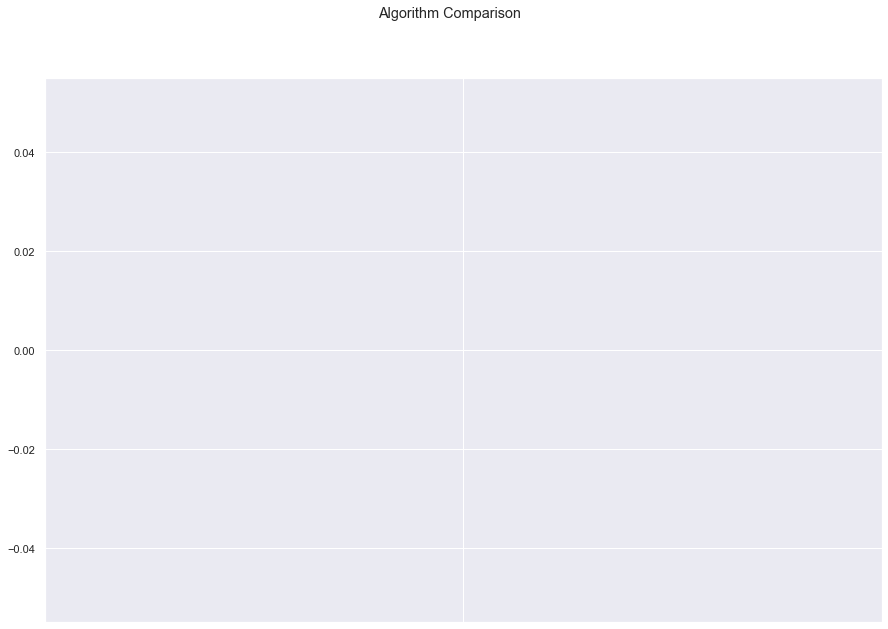

In [25]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
import statsmodels.api as sm

In [27]:
STAT_Model = sm.OLS(training_target, training_features)

NameError: name 'training_target' is not defined

In [28]:
results = STAT_Model.fit()

NameError: name 'STAT_Model' is not defined

In [29]:
print(results.summary2())

AttributeError: 'list' object has no attribute 'summary2'

In [30]:
STAT_Predictions =STAT_Model.predict(results.params, exog = test_features)

NameError: name 'STAT_Model' is not defined

In [31]:
test_target.head()

NameError: name 'test_target' is not defined

In [32]:
def rmse(y_test, preds):
    return np.sqrt(np.mean((y_test - preds)**2))

In [33]:
rmse(test_target, STAT_Predictions)

NameError: name 'test_target' is not defined

In [34]:
df_test_over_prob.head()

,length_of_residence,do_not_direct_mail_solicit,email_available,member_tenure_years,number_of_children
0,14.000000,0.0,0.833333,35.333333,0.000000
1,5.000000,0.0,0.000000,37.333333,1.000000
2,15.000000,0.0,0.500000,10.000000,0.000000
3,12.142857,0.0,0.857143,36.285714,1.142857
4,15.000000,0.0,0.500000,33.000000,0.000000


In [35]:
df_test_over_prob.columns

Index(['length_of_residence', 'do_not_direct_mail_solicit', 'email_available',
       'member_tenure_years', 'number_of_children'],
      dtype='object')

In [36]:
df_test_over_prob_cp = df_test_over_prob.copy()
df_test_over_prob_cp.head()

,length_of_residence,do_not_direct_mail_solicit,email_available,member_tenure_years,number_of_children
0,14.000000,0.0,0.833333,35.333333,0.000000
1,5.000000,0.0,0.000000,37.333333,1.000000
2,15.000000,0.0,0.500000,10.000000,0.000000
3,12.142857,0.0,0.857143,36.285714,1.142857
4,15.000000,0.0,0.500000,33.000000,0.000000


In [37]:
X = df_test_over_prob_cp.drop('historical_sales_volume', axis = 1)
y = df_test_over_prob_cp.historical_sales_volume

from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

KeyError: "['historical_sales_volume'] not found in axis"

In [38]:
LRM = LinearRegression()
LRM.fit(training_features, training_target)

NameError: name 'training_features' is not defined

In [39]:
X['Regression_preds'] = LRM.predict(X)

NameError: name 'X' is not defined

In [40]:
X['E_Profit']= .22* X['predicted_prob_sale'] * X['Regression_preds'] - 8.40 * X['predicted_prob_sale'] - 45.65

NameError: name 'X' is not defined

In [41]:
np.log(X['E_Profit']).hist()

NameError: name 'X' is not defined